In [1]:
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
# from  matplotlib.pyplot import figure

In [2]:
X,_ = make_blobs(n_samples=500,n_features=2, centers=3, random_state=20)

In [3]:
df = DataFrame(dict(x= X[:,0], y = X[:,1]))

In [4]:
df.head()

,x,y
0,-11.057949,2.357580
1,3.300260,6.922642
2,-11.600507,2.896950
3,-10.422393,3.946001
4,2.290344,8.110113


Text(0, 0.5, 'x2')

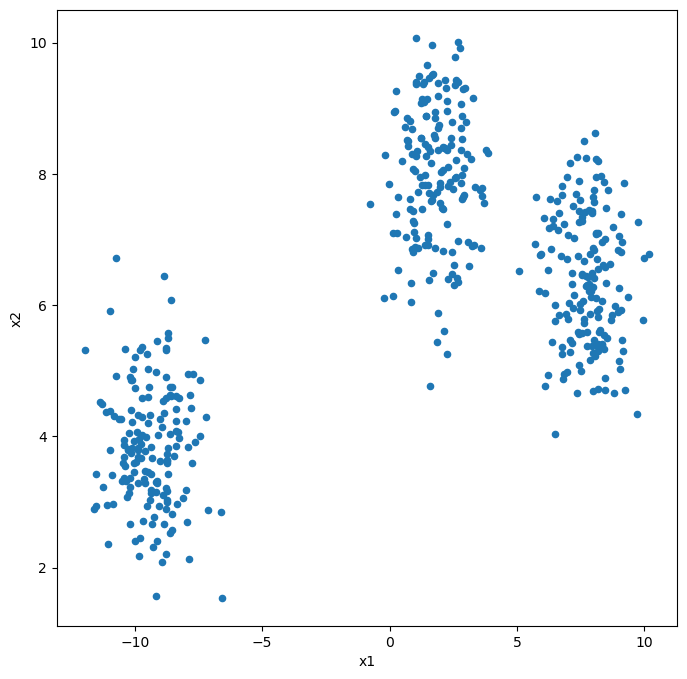

In [5]:
fig,ax = plt.subplots(figsize = (8,8))
df.plot(ax = ax, kind = 'scatter',x='x',y='y' )
plt.xlabel('x1')
plt.ylabel('x2')

## DBSCAN 

In [6]:
from sklearn.cluster import DBSCAN

In [7]:
dbscan = DBSCAN(eps=1,min_samples=5).fit(X)

In [8]:
cluster = dbscan.labels_

In [9]:
len(set(cluster))

4

### Visualization

In [10]:
def show_clusters(X,cluster):
    df = DataFrame(dict(x= X[:,0], y= X[:,1], label = cluster))
    colors = {-1:'red', 0:'green',1:'yellow',2:'skyblue',3:'blue'}
    fig,ax = plt.subplots(figsize = (8,8))
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind = 'scatter',x='x',y='y',label= key,color= colors[key])
    plt.xlabel('x1')
    plt.ylabel('x2')

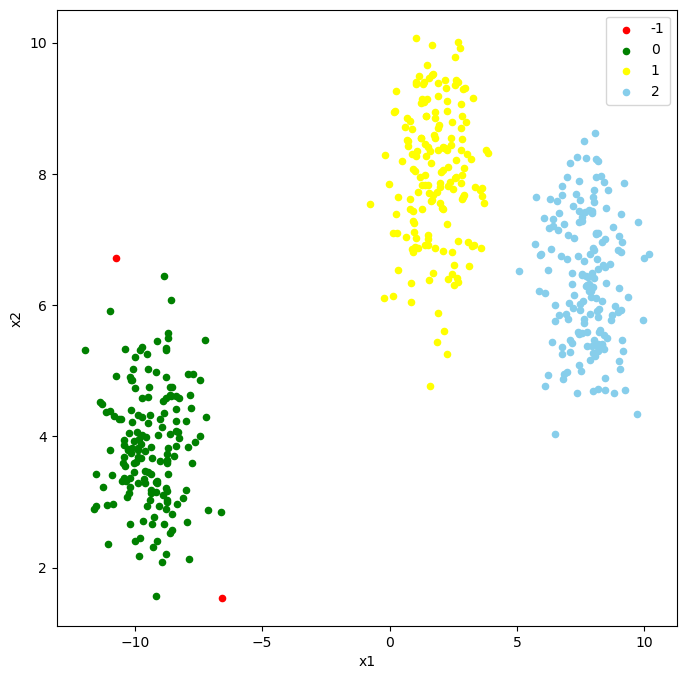

In [11]:
show_clusters(X,cluster)

### calculating silhouette score 

In [12]:
from sklearn.metrics import silhouette_score

In [13]:
silhtt = silhouette_score(X,cluster)

In [14]:
silhtt

0.6463654116326837